In [165]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 524.5 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 657.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 330.2 kB/s eta 0:00:0000:0100:01


In [1642]:
!pip install pytorch-forecasting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 2.4 MB/s eta 0:00:0000:0100:01
  Using cached typing_extensions-4.8.0-py3-none-any.whl.metadata (3.0 kB)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 2.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.8/155.8 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 2.3 MB/s eta 0:00:00a 0:00:01
Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 2.1 MB/

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch import nn, Tensor, IntTensor

from pytorch_forecasting import metrics

from typing import Tuple

import time

# WALMART

### TRAIN

In [7]:
walmart_sales_train_df = pd.read_csv("../data/raw/train.csv")
walmart_sales_train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [8]:
print(f"Количество тренировочных строк - {walmart_sales_train_df.shape[0]}")
print(f"Количество колонок - {walmart_sales_train_df.shape[1]}")
print(f"\nКолонки:\n")
print('\n'.join(walmart_sales_train_df.columns))

Количество тренировочных строк - 421570
Количество колонок - 5

Колонки:

Store
Dept
Date
Weekly_Sales
IsHoliday


In [9]:
print("""
Store - номер магазина \n
Dept - номер департамента магазина\n
Date - дата\n
Weekly_Sales - продажи за неделю(таргет)\n
IsHoliday - выходной ли\n""")


Store - номер магазина 

Dept - номер департамента магазина

Date - дата

Weekly_Sales - продажи за неделю(таргет)

IsHoliday - выходной ли



In [10]:
walmart_sales_train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [11]:
unique_store = walmart_sales_train_df.Store.unique()
print(f"Магазины могут быть - {unique_store}")
print(f"Длина - {len(unique_store)}\n")

unique_dept = sorted(list(walmart_sales_train_df.Dept.unique()))
print(f"Департаменты могут быть - {unique_dept}")
print(f"Длина - {len(unique_dept)}\n")

walmart_sales_train_df.groupby(['Store','Dept']).size().reset_index().rename(columns={0:'Сount'})

Магазины могут быть - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Длина - 45

Департаменты могут быть - [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Длина - 81



,Store,Dept,Сount
0,1,1,143
1,1,2,143
2,1,3,143
3,1,4,143
4,1,5,143
...,...,...,...
3326,45,94,134
3327,45,95,143
3328,45,96,2
3329,45,97,143


### TEST

In [19]:
walmart_sales_test_df = pd.read_csv("../data/raw/test.csv")
walmart_sales_test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [13]:
temp_dates = walmart_sales_test_df[(walmart_sales_test_df.Store == 1) & (walmart_sales_test_df.Dept == 1)].Date

temp_dates = pd.to_datetime(temp_dates)
temp_dates.max()

Timestamp('2013-07-26 00:00:00')

### FEATURES

In [21]:
walmart_features_df = pd.read_csv("../data/raw/features.csv")
walmart_features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [15]:
walmart_features_df.Date = pd.to_datetime(walmart_features_df.Date)

In [16]:
print(walmart_features_df.Date.value_counts().to_string())

Date
2010-02-05    45
2012-04-13    45
2012-04-27    45
2012-05-04    45
2012-05-11    45
2012-05-18    45
2012-05-25    45
2012-06-01    45
2012-06-08    45
2012-06-15    45
2012-06-22    45
2012-06-29    45
2012-07-06    45
2012-07-13    45
2012-07-20    45
2012-07-27    45
2012-08-03    45
2012-08-10    45
2012-08-17    45
2012-08-24    45
2012-08-31    45
2012-04-20    45
2012-04-06    45
2012-09-14    45
2012-03-30    45
2011-11-18    45
2011-11-25    45
2011-12-02    45
2011-12-09    45
2011-12-16    45
2011-12-23    45
2011-12-30    45
2012-01-06    45
2012-01-13    45
2012-01-20    45
2012-01-27    45
2012-02-03    45
2012-02-10    45
2012-02-17    45
2012-02-24    45
2012-03-02    45
2012-03-09    45
2012-03-16    45
2012-03-23    45
2012-09-07    45
2012-09-21    45
2010-02-12    45
2013-03-01    45
2013-03-15    45
2013-03-22    45
2013-03-29    45
2013-04-05    45
2013-04-12    45
2013-04-19    45
2013-04-26    45
2013-05-03    45
2013-05-10    45
2013-05-17    45
2013-05-2

### Stores

In [17]:
walmart_stores_df = pd.read_csv("../data/raw/stores.csv")
walmart_stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


#### Merging datasets

In [22]:
X = pd.merge(walmart_stores_df, pd.merge(walmart_sales_train_df, walmart_features_df))

In [23]:
X = X.drop(columns=["MarkDown1", 'MarkDown2', 'MarkDown3', "MarkDown4", 'MarkDown5', 'Type', 'Fuel_Price'])

In [24]:
X

,Store,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,CPI,Unemployment
0,1,151315,1,2010-02-05,24924.50,False,42.31,211.096358,8.106
1,1,151315,2,2010-02-05,50605.27,False,42.31,211.096358,8.106
2,1,151315,3,2010-02-05,13740.12,False,42.31,211.096358,8.106
3,1,151315,4,2010-02-05,39954.04,False,42.31,211.096358,8.106
4,1,151315,5,2010-02-05,32229.38,False,42.31,211.096358,8.106
...,...,...,...,...,...,...,...,...,...
421565,45,118221,93,2012-10-26,2487.80,False,58.85,192.308899,8.667
421566,45,118221,94,2012-10-26,5203.31,False,58.85,192.308899,8.667
421567,45,118221,95,2012-10-26,56017.47,False,58.85,192.308899,8.667
421568,45,118221,97,2012-10-26,6817.48,False,58.85,192.308899,8.667


#### Preprocessing Date

In [25]:
X.Date = pd.to_datetime(X.Date)

#### Sorting X by date

In [26]:
X = X.sort_values(by=['Date', 'Store'])

#### Replacing date with number of a week

In [27]:
X['Week'] = X.Date.apply(lambda x: x.isocalendar()[1])

In [28]:
X = X.drop(['Date'], axis=1)

#### Splitting dataset to train/val/test sets

In [29]:
X_len = X.shape[0]

In [30]:
test_ratio = 0.1
val_ratio = 0.2

In [31]:
test_size = int(X_len * test_ratio)
val_size = int(X_len * val_ratio)

In [32]:
X_test = X.iloc[X_len-test_size:]
X_val = X.iloc[X_len-test_size-val_size:X_len-test_size]
X_train = X.iloc[:X_len-test_size-val_size]

#### Preprocessing Store

In [33]:
store_label_encoder = LabelEncoder()
store_label_encoder.fit(sorted(list(X_train.Store.unique())))

LabelEncoder()

In [34]:
X_train['Store'] = store_label_encoder.transform(X_train[['Store']])
X_val['Store'] = store_label_encoder.transform(X_val[['Store']])
X_test['Store'] = store_label_encoder.transform(X_test[['Store']])

/Users/astonuser/anaconda3/envs/transformer_time_series_forecast/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/3350660351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Store'] = store_label_encoder.transform(X_train[['Store']])
/Users/astonuser/anaconda3/envs/transformer_time_series_forecast/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

#### Preprocessing Dept

In [35]:
dept_label_encoder = LabelEncoder()
dept_label_encoder.fit(sorted(list(X_train.Dept.unique())))

LabelEncoder()

In [36]:
X_train['Dept'] = dept_label_encoder.transform(X_train[['Dept']])
X_val['Dept'] = dept_label_encoder.transform(X_val[['Dept']])
X_test['Dept'] = dept_label_encoder.transform(X_test[['Dept']])

/Users/astonuser/anaconda3/envs/transformer_time_series_forecast/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/2324919871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Dept'] = dept_label_encoder.transform(X_train[['Dept']])
/Users/astonuser/anaconda3/envs/transformer_time_series_forecast/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

#### Preprocessing Size

In [37]:
size_min_max_scaler = MinMaxScaler()
size_min_max_scaler.fit(X_train[['Size']])

MinMaxScaler()

In [38]:
X_train.Size = size_min_max_scaler.transform(X_train[['Size']])
X_val.Size = size_min_max_scaler.transform(X_val[['Size']])
X_test.Size = size_min_max_scaler.transform(X_test[['Size']])

/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/2702060106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.Size = size_min_max_scaler.transform(X_train[['Size']])
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/2702060106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val.Size = size_min_max_scaler.transform(X_val[['Size']])
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/2702060106.py:3: SettingWithCopyWarning: 
A value is trying to be s

#### Preprocessing IsHoliday

In [39]:
is_holiday_transformer = lambda x: 1 if x else 0

In [40]:
X_train.IsHoliday = X_train.IsHoliday.apply(is_holiday_transformer)
X_val.IsHoliday = X_val.IsHoliday.apply(is_holiday_transformer)
X_test.IsHoliday = X_test.IsHoliday.apply(is_holiday_transformer)

/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/3890250643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.IsHoliday = X_train.IsHoliday.apply(is_holiday_transformer)
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/3890250643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val.IsHoliday = X_val.IsHoliday.apply(is_holiday_transformer)
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/3890250643.py:3: SettingWithCopyWarning: 
A value is trying

#### Preprocessing Temperature

In [41]:
temperature_min_max_scaler = MinMaxScaler()
temperature_min_max_scaler.fit(X_train[['Temperature']])

MinMaxScaler()

In [42]:
X_train.Temperature = temperature_min_max_scaler.transform(X_train[['Temperature']])
X_val.Temperature = temperature_min_max_scaler.transform(X_val[['Temperature']])
X_test.Temperature = temperature_min_max_scaler.transform(X_test[['Temperature']])

/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/1389029567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.Temperature = temperature_min_max_scaler.transform(X_train[['Temperature']])
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/1389029567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val.Temperature = temperature_min_max_scaler.transform(X_val[['Temperature']])
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/1389029567.py:3: SettingW

#### Preprocessing CPI

In [43]:
cpi_min_max_scaler = MinMaxScaler()
cpi_min_max_scaler.fit(X_train[['CPI']])

MinMaxScaler()

In [44]:
X_train.CPI = cpi_min_max_scaler.transform(X_train[['CPI']])
X_val.CPI = cpi_min_max_scaler.transform(X_val[['CPI']])
X_test.CPI = cpi_min_max_scaler.transform(X_test[['CPI']])

/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/2361466852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.CPI = cpi_min_max_scaler.transform(X_train[['CPI']])
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/2361466852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val.CPI = cpi_min_max_scaler.transform(X_val[['CPI']])
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/2361466852.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

#### Preprocessing Unemployment

In [45]:
unemployment_min_max_scaler = MinMaxScaler()
unemployment_min_max_scaler.fit(X_train[['Unemployment']])

MinMaxScaler()

In [46]:
X_train.Unemployment = unemployment_min_max_scaler.transform(X_train[['Unemployment']])
X_val.Unemployment = unemployment_min_max_scaler.transform(X_val[['Unemployment']])
X_test.Unemployment = unemployment_min_max_scaler.transform(X_test[['Unemployment']])

/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/1471874588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.Unemployment = unemployment_min_max_scaler.transform(X_train[['Unemployment']])
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/1471874588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val.Unemployment = unemployment_min_max_scaler.transform(X_val[['Unemployment']])
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/1471874588.py:3: Se

#### Preprocessing Weekly_Sales

In [47]:
weekly_sales_quantile_transformer = QuantileTransformer()
weekly_sales_quantile_transformer.fit(X_train[['Weekly_Sales']])

QuantileTransformer()

In [48]:
X_train.Weekly_Sales = weekly_sales_quantile_transformer.transform(X_train[['Weekly_Sales']])
X_val.Weekly_Sales = weekly_sales_quantile_transformer.transform(X_val[['Weekly_Sales']])
X_test.Weekly_Sales = weekly_sales_quantile_transformer.transform(X_test[['Weekly_Sales']])

/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/3902564762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.Weekly_Sales = weekly_sales_quantile_transformer.transform(X_train[['Weekly_Sales']])
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/3902564762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val.Weekly_Sales = weekly_sales_quantile_transformer.transform(X_val[['Weekly_Sales']])
/var/folders/7x/qzp6r7jn19gf5g0r68gpc_3r0000gp/T/ipykernel_41431/3902564

### Making Temporary Store Sales

Store[1...45]:
    dept
    size
    date - list
    weekly - list
    is_holiday - list
    temperature - list
    CPI - list
    Unemployment - list

In [49]:
class StoreSales:
    def __init__(self, store, dept, size, week, weekly_sales, is_holiday, temperature, cpi, unemployment, indices_window_size, indices_step_size):
        self.store = store
        self.dept = dept
        self.size = size
        
        self.week = week
        self.week_sin = self.sin_transform(self.week)
        self.week_cos = self.cos_transform(self.week)
        
        self.weekly_sales = weekly_sales
        self.is_holiday = is_holiday
        self.temperature = temperature
        self.cpi = cpi
        self.unemployment = unemployment
        
        self.indices = self.get_indices(window_size=indices_window_size, step_size=indices_step_size)
    
    def get_indices(self, window_size, step_size):
        
        stop_position = len(self.weekly_sales) - 1
        
        subseq_first_idx = 0
        
        subseq_last_idx = window_size
        
        indices = []
        
        while subseq_last_idx <= stop_position:

            indices.append((subseq_first_idx, subseq_last_idx))
            
            subseq_first_idx += step_size
            
            subseq_last_idx += step_size

        return indices
    
    def get_sequence(self, index):
        tabular_categorical_features = (self.store, self.dept)
        tabular_numerical_features = (self.size)
        tabular_features = [tabular_categorical_features, tabular_numerical_features]

        start_idx = self.indices[index][0]
        end_idx = self.indices[index][1]
        
        weeks = self.week[start_idx:end_idx]
        weeks_sin = self.week_sin[start_idx:end_idx]
        weeks_cos = self.week_cos[start_idx:end_idx]
        
        time_series = self.weekly_sales[start_idx:end_idx]
        
        holidays = self.is_holiday[start_idx:end_idx]
        temperatures = self.temperature[start_idx:end_idx]
        cpis = self.cpi[start_idx:end_idx]
        unemployments = self.unemployment[start_idx:end_idx]
        
        time_series_features = [((holidays[i]), (time_series[i], weeks_sin[i], weeks_cos[i], temperatures[i], cpis[i], unemployments[i])) for i in range(len(time_series))]
        
        return (tabular_features, time_series_features)
    
    def sin_transform(self, values):
        values = np.array(values)
        return np.sin(2 * np.pi * values / 52)

    def cos_transform(self, values):
        values = np.array(values)
        return np.cos(2 * np.pi * values / 52)
        


In [50]:
def get_temp_store_sales(df):
    stores_sales = []
    store_nums = sorted(list(X_train.Store.unique()))
    for store_num in store_nums:
        df_store = df[df.Store == store_num]
    
        dept_nums = sorted(list(df_store.Dept.unique()))
    
        for dept_num in dept_nums:
            df_store_dept = df_store[df_store.Dept == dept_num]
        
            store_dept_sales = StoreSales(
                store=store_num,
                dept=dept_num, 
                size=float(df_store_dept.Size.unique()[0]), 
                week=df_store_dept.Week.tolist(), 
                weekly_sales=df_store_dept.Weekly_Sales.tolist(), 
                is_holiday=df_store_dept.IsHoliday.tolist(), 
                temperature=df_store_dept.Temperature.tolist(), 
                cpi=df_store_dept.CPI.tolist(), 
                unemployment=df_store_dept.Unemployment.tolist(), 
                indices_window_size=14, 
                indices_step_size=1)
        
            stores_sales.append(store_dept_sales)
    return stores_sales

In [51]:
train_store_sales = get_temp_store_sales(X_train)
val_store_sales = get_temp_store_sales(X_val)
test_store_sales = get_temp_store_sales(X_test)

In [52]:
def get_subsequences(store_sales):
    subsequences = []
    for store_sale in store_sales:
        for subsequence_i in range(len(store_sale.indices)):
            subsequent = store_sale.get_sequence(subsequence_i)
            subsequences.append(subsequent)
    return subsequences

In [53]:
train_sequences = get_subsequences(train_store_sales)
val_sequences = get_subsequences(val_store_sales)
test_sequences = get_subsequences(test_store_sales)

In [81]:
train_sequences[0][1]

[(0,
  (0.7949050450975976,
   0.5680647467311558,
   0.8229838658936564,
   0.43414872798434445,
   0.8732979481134047,
   0.37258667744870105)),
 (1,
  (0.9106288561724998,
   0.6631226582407952,
   0.7485107481711011,
   0.3969667318982387,
   0.8747954600463519,
   0.37258667744870105)),
 (0,
  (0.8931248462908492,
   0.7485107481711011,
   0.6631226582407953,
   0.41086105675146767,
   0.8752778824172571,
   0.37258667744870105)),
 (0,
  (0.7366687245616126,
   0.8229838658936564,
   0.5680647467311558,
   0.4764187866927593,
   0.8755911230233195,
   0.37258667744870105)),
 (0,
  (0.7665001357254528,
   0.8854560256532098,
   0.4647231720437686,
   0.47514677103718195,
   0.8759043636293815,
   0.37258667744870105)),
 (0,
  (0.7577648113620016,
   0.9350162426854148,
   0.35460488704253557,
   0.5856164383561644,
   0.8762176042354435,
   0.37258667744870105)),
 (0,
  (0.7698973274961819,
   0.970941817426052,
   0.23931566428755804,
   0.5542074363992172,
   0.8745229427731145,


In [54]:
len(train_sequences)

250840

In [55]:
len(val_sequences)

41657

In [56]:
len(test_sequences)

632

In [57]:
len(train_sequences[0][1])

14

## Making Dataset

In [95]:
class WalmartDataset(Dataset):
    def __init__(self, data, enc_seq_len: int, dec_seq_len: int, target_seq_len: int):
        super().__init__()
        
        self.data = data # (tabular_features,time_series_features)
        
        self.enc_seq_len = enc_seq_len
        self.dec_seq_len = dec_seq_len
        self.target_seq_len = target_seq_len
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data[index]
        
        tabular_features, time_series_features = item
        src_time_series_categorical_features, src_time_series_numerical_features, trg_time_series_categorical_features, trg_time_series_numerical_features, trg_y = self.get_src_trg(time_series_features)
        
        tabular_categorical_features, tabular_numerical_features = tabular_features
        tabular_categorical_features, tabular_numerical_features = list(tabular_categorical_features), [tabular_numerical_features]
        
        return {
            'tabular_categorical_features': torch.IntTensor(tabular_categorical_features),
            'tabular_numerical_features': torch.Tensor(tabular_numerical_features),
            'src_time_series_categorical_features': torch.IntTensor(src_time_series_categorical_features),
            'src_time_series_numerical_features': torch.Tensor(src_time_series_numerical_features),
            'trg_time_series_categorical_features': torch.IntTensor(trg_time_series_categorical_features),
            'trg_time_series_numerical_features': torch.Tensor(trg_time_series_numerical_features),
            'trg_y': torch.Tensor(trg_y)
        }
        
    
    def get_src_trg(
            self,
            time_series_features
    ) -> Tuple[torch.tensor, torch.tensor, torch.tensor]:

        #assert len(time_series_features) == self.enc_seq_len + self.target_seq_len, "Features length does not equal (input length + target length)"
        
        time_series_categorical_features = []
        time_series_numerical_features = []
        for t in range(len(time_series_features)):
            time_step = time_series_features[t]
            time_series_categorical_features.append(time_step[0])
            time_series_numerical_features.append(list(time_step[1]))
        
        src_time_series_categorical_features = time_series_categorical_features[:self.enc_seq_len]
        src_time_series_numerical_features = time_series_numerical_features[:self.enc_seq_len]
        
        trg_time_series_categorical_features = time_series_categorical_features[self.enc_seq_len - 1:self.enc_seq_len - 1 + self.dec_seq_len]
        trg_time_series_numerical_features = time_series_numerical_features[self.enc_seq_len - 1:self.enc_seq_len - 1 + self.dec_seq_len]

        #assert len(trg_time_series_numerical_features) == self.dec_seq_len, "Length of trg num does not match target sequence length"
        #assert len(trg_time_series_categorical_features) == self.dec_seq_len, "Length of trg cat does not match target sequence length"

        
        trg_y_numerical_features = time_series_numerical_features[-self.target_seq_len:]
        
        trg_y = [trg_y_numerical_features[-1][0]]
        
        return src_time_series_categorical_features, src_time_series_numerical_features, trg_time_series_categorical_features, trg_time_series_numerical_features, trg_y

In [96]:
enc_seq_len = 10
dec_seq_len = 4
target_seq_len = 1

In [97]:
train_dataset = WalmartDataset(
    data=train_sequences, 
    enc_seq_len=enc_seq_len, 
    dec_seq_len=dec_seq_len, 
    target_seq_len=target_seq_len
)

val_dataset = WalmartDataset(
    data=val_sequences, 
    enc_seq_len=enc_seq_len, 
    dec_seq_len=dec_seq_len, 
    target_seq_len=target_seq_len
)

test_dataset = WalmartDataset(
    data=test_sequences, 
    enc_seq_len=enc_seq_len, 
    dec_seq_len=dec_seq_len, 
    target_seq_len=target_seq_len
)

In [98]:
train_dataset[0]

{'tabular_categorical_features': tensor([0, 0], dtype=torch.int32),
 'tabular_numerical_features': tensor([0.6303]),
 'src_time_series_categorical_features': tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32),
 'src_time_series_numerical_features': tensor([[ 7.9491e-01,  5.6806e-01,  8.2298e-01,  4.3415e-01,  8.7330e-01,
           3.7259e-01],
         [ 9.1063e-01,  6.6312e-01,  7.4851e-01,  3.9697e-01,  8.7480e-01,
           3.7259e-01],
         [ 8.9312e-01,  7.4851e-01,  6.6312e-01,  4.1086e-01,  8.7528e-01,
           3.7259e-01],
         [ 7.3667e-01,  8.2298e-01,  5.6806e-01,  4.7642e-01,  8.7559e-01,
           3.7259e-01],
         [ 7.6650e-01,  8.8546e-01,  4.6472e-01,  4.7515e-01,  8.7590e-01,
           3.7259e-01],
         [ 7.5776e-01,  9.3502e-01,  3.5460e-01,  5.8562e-01,  8.7622e-01,
           3.7259e-01],
         [ 7.6990e-01,  9.7094e-01,  2.3932e-01,  5.5421e-01,  8.7452e-01,
           3.7259e-01],
         [ 8.0411e-01,  9.9271e-01,  1.2054e-01,  5.

In [102]:
import torch
import math
from torch import nn, Tensor, IntTensor


class FeedForwardLayer(nn.Module):
    def __init__(
            self,
            input_size=1,
            hidden_size=32,
            output_size=32
    ):
        super(FeedForwardLayer, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


class EmbeddingLayer(nn.Module):
    def __init__(
            self,
            tabular_cat_features_size: int,  # 2
            tabular_cat_features_possible_nums: IntTensor,  # [45, 81]
            tabular_cat_features_embeddings_dim: int,  # 32

            tabular_num_features_size: int,  # 1
            tabular_num_features_ffn_hidden_size: int,  # 32
            tabular_num_features_ffn_output_dim: int,  # 22

            time_series_cat_features_size: int,  # 1
            time_series_cat_features_possible_nums: IntTensor,  # [2]
            time_series_cat_features_embeddings_dim: int,  # 16

            time_series_size: int,  # 10

            d_model: int = 512,

    ):
        super().__init__()

        self.tabular_cat_features_embeddings_table = torch.nn.ModuleList(
            [torch.nn.Embedding(num_embeddings=tabular_cat_features_possible_nums[cat_feature_i],
                                embedding_dim=tabular_cat_features_embeddings_dim)
             for cat_feature_i in range(tabular_cat_features_size)]
        )

        self.tabular_cat_features_pos_embeddings_table = nn.Embedding(num_embeddings=tabular_cat_features_size + 1,
                                                                      embedding_dim=tabular_cat_features_embeddings_dim)

        self.tabular_num_features_ffn = FeedForwardLayer(input_size=tabular_num_features_size,
                                                         hidden_size=tabular_num_features_ffn_hidden_size,
                                                         output_size=tabular_num_features_ffn_output_dim)

        self.time_series_cat_features_embeddings_table = nn.ModuleList(
            [nn.Embedding(num_embeddings=time_series_cat_features_possible_nums[cat_feature_i],
                          embedding_dim=time_series_cat_features_embeddings_dim)
             for cat_feature_i in range(time_series_cat_features_size)]
        )

        self.tabular_cat_features_size = tabular_cat_features_size
        self.tabular_num_features_size = tabular_num_features_size
        self.tabular_features_size = tabular_cat_features_size + tabular_num_features_size

        self.time_series_cat_features_size = time_series_cat_features_size
        self.time_series_size = time_series_size

        self.column_embedding_table = torch.nn.Embedding(num_embeddings=self.tabular_features_size + 1,
                                                         embedding_dim=tabular_cat_features_embeddings_dim)
        self.positional_embedding_table = torch.nn.Embedding(num_embeddings=self.time_series_size + 1,
                                                             embedding_dim=tabular_cat_features_embeddings_dim)

        self.linear_layer = nn.Linear(
            in_features=self.time_series_size * tabular_num_features_ffn_output_dim + self.tabular_cat_features_size * tabular_cat_features_embeddings_dim + tabular_num_features_size * tabular_num_features_ffn_output_dim,
            out_features=d_model
        )

    def forward(
            self,
            tabular_cat_features: Tensor,
            tabular_num_features: Tensor,
            time_series_cat_features: Tensor,
            time_series_num_features: Tensor
    ):
        batch_size = tabular_cat_features.shape[0]

        tabular_cat_features_embeddings = torch.stack(
            [self.tabular_cat_features_embeddings_table[cat_feature_i](tabular_cat_features[:, cat_feature_i].long())
             for cat_feature_i in range(tabular_cat_features.shape[1])], dim=0)

        tabular_num_features = tabular_num_features.reshape(self.tabular_num_features_size, batch_size, -1)
        tabular_num_features_embeddings = self.tabular_num_features_ffn(tabular_num_features)

        time_series_cat_features = time_series_cat_features.reshape(self.time_series_size, batch_size, -1)
        time_series_cat_features_embeddings = torch.cat([self.time_series_cat_features_embeddings_table[cat_feature_i](
            time_series_cat_features[:, :, cat_feature_i].long())
            for cat_feature_i in
            range(time_series_cat_features.shape[-1])], dim=-1)

        time_series_num_features = time_series_num_features.reshape(self.time_series_size, batch_size, -1)

        tabular_embeddings = torch.cat([tabular_cat_features_embeddings, tabular_num_features_embeddings], dim=0)
        time_series_embeddings = torch.cat([time_series_cat_features_embeddings, time_series_num_features], dim=-1)
        
        time_series_embeddings += self.column_embedding_table(torch.IntTensor([0]))
        for step_i in range(len(time_series_embeddings)):
            time_series_embeddings[step_i] += self.positional_embedding_table(torch.IntTensor([step_i + 1]))

        tabular_embeddings += self.positional_embedding_table(torch.IntTensor([0]))
        for column_i in range(len(tabular_embeddings)):
            tabular_embeddings[column_i] += self.column_embedding_table(torch.IntTensor([column_i + 1]))

        time_series_embeddings = time_series_embeddings.reshape(batch_size, self.time_series_size, -1)
        tabular_embeddings = tabular_embeddings.reshape(batch_size, self.tabular_features_size, -1)

        return self.linear_layer(torch.cat([tabular_embeddings, time_series_embeddings], dim=1).reshape(batch_size, -1))


class TimeSeriesTransformer(nn.Module):
    """
    This class implements a transformer model that can be used for times series
    forecasting. This time series transformer model is based on the paper by
    Wu et al (2020) [1]. The paper will be referred to as "the paper".

    A detailed description of the code can be found in my article here:

    https://towardsdatascience.com/how-to-make-a-pytorch-transformer-for-time-series-forecasting-69e073d4061e

    In cases where the paper does not specify what value was used for a specific
    configuration/hyperparameter, this class uses the values from Vaswani et al
    (2017) [2] or from PyTorch source code.

    Unlike the paper, this class assumes that input layers, positional encoding
    layers and linear mapping layers are separate from the encoder and decoder,
    i.e. the encoder and decoder only do what is depicted as their sub-layers
    in the paper. For practical purposes, this assumption does not make a
    difference - it merely means that the linear and positional encoding layers
    are implemented inside the present class and not inside the
    Encoder() and Decoder() classes.

    [1] Wu, N., Green, B., Ben, X., O'banion, S. (2020).
    'Deep Transformer Models for Time Series Forecasting:
    The Influenza Prevalence Case'.
    arXiv:2001.08317 [cs, stat] [Preprint].
    Available at: http://arxiv.org/abs/2001.08317 (Accessed: 9 March 2022).

    [2] Vaswani, A. et al. (2017)
    'Attention Is All You Need'.
    arXiv:1706.03762 [cs] [Preprint].
    Available at: http://arxiv.org/abs/1706.03762 (Accessed: 9 March 2022).

    """

    def __init__(self,
                 tabular_cat_features_size: int,  # 2
                 tabular_cat_features_possible_nums: IntTensor,  # [45, 81]
                 tabular_cat_features_embeddings_dim: int,  # 32

                 tabular_num_features_size: int,  # 1
                 tabular_num_features_ffn_hidden_size: int,  # 32
                 tabular_num_features_ffn_output_dim: int,  # 22

                 time_series_cat_features_size: int,  # 1
                 time_series_cat_features_possible_nums: IntTensor,  # [2]
                 time_series_cat_features_embeddings_dim: int,  # 16

                 enc_seq_len: int,  # 10

                 dec_seq_len: int = 4,
                 batch_first: bool = True,
                 out_seq_len: int = 1,
                 dim_val: int = 512,
                 n_encoder_layers: int = 4,
                 n_decoder_layers: int = 4,
                 n_heads: int = 8,
                 dropout_encoder: float = 0.2,
                 dropout_decoder: float = 0.2,
                 dropout_pos_enc: float = 0.1,
                 dim_feedforward_encoder: int = 2048,
                 dim_feedforward_decoder: int = 2048,
                 num_predicted_features: int = 1
                 ):
        """
        Args:

            input_size: int, number of input variables. 1 if univariate.

            dec_seq_len: int, the length of the input sequence fed to the decoder

            dim_val: int, aka d_model. All sub-layers in the model produce
                     outputs of dimension dim_val

            n_encoder_layers: int, number of stacked encoder layers in the encoder

            n_decoder_layers: int, number of stacked encoder layers in the decoder

            n_heads: int, the number of attention heads (aka parallel attention layers)

            dropout_encoder: float, the dropout rate of the encoder

            dropout_decoder: float, the dropout rate of the decoder

            dropout_pos_enc: float, the dropout rate of the positional encoder

            dim_feedforward_encoder: int, number of neurons in the linear layer
                                     of the encoder

            dim_feedforward_decoder: int, number of neurons in the linear layer
                                     of the decoder

            num_predicted_features: int, the number of features you want to predict.
                                    Most of the time, this will be 1 because we're
                                    only forecasting FCR-N prices in DK2, but in
                                    we wanted to also predict FCR-D with the same
                                    model, num_predicted_features should be 2.
        """

        super().__init__()

        self.dec_seq_len = dec_seq_len

        # print("input_size is: {}".format(input_size))
        # print("dim_val is: {}".format(dim_val))

        # Creating the three linear layers needed for the model
        self.encoder_embedding_layer = EmbeddingLayer(
            tabular_cat_features_size=tabular_cat_features_size,
            tabular_cat_features_possible_nums=tabular_cat_features_possible_nums,
            tabular_cat_features_embeddings_dim=tabular_cat_features_embeddings_dim,
            tabular_num_features_size=tabular_num_features_size,
            tabular_num_features_ffn_hidden_size=tabular_num_features_ffn_hidden_size,
            tabular_num_features_ffn_output_dim=tabular_num_features_ffn_output_dim,
            time_series_cat_features_size=time_series_cat_features_size,
            time_series_cat_features_possible_nums=time_series_cat_features_possible_nums,
            time_series_cat_features_embeddings_dim=time_series_cat_features_embeddings_dim,
            time_series_size=enc_seq_len
        )

        self.decoder_embedding_layer = EmbeddingLayer(
            tabular_cat_features_size=tabular_cat_features_size,
            tabular_cat_features_possible_nums=tabular_cat_features_possible_nums,
            tabular_cat_features_embeddings_dim=tabular_cat_features_embeddings_dim,
            tabular_num_features_size=tabular_num_features_size,
            tabular_num_features_ffn_hidden_size=tabular_num_features_ffn_hidden_size,
            tabular_num_features_ffn_output_dim=tabular_num_features_ffn_output_dim,
            time_series_cat_features_size=time_series_cat_features_size,
            time_series_cat_features_possible_nums=time_series_cat_features_possible_nums,
            time_series_cat_features_embeddings_dim=time_series_cat_features_embeddings_dim,
            time_series_size=dec_seq_len
        )

        self.linear_mapping = nn.Linear(
            in_features=dim_val,
            out_features=num_predicted_features
        )

        # The encoder layer used in the paper is identical to the one used by
        # Vaswani et al (2017) on which the PyTorch module is based.
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=dim_val,
            nhead=n_heads,
            dim_feedforward=dim_feedforward_encoder,
            dropout=dropout_encoder,
            batch_first=batch_first
        )

        # Stack the encoder layers in nn.TransformerDecoder
        # It seems the option of passing a normalization instance is redundant
        # in my case, because nn.TransformerEncoderLayer per default normalizes
        # after each sub-layer
        # (https://github.com/pytorch/pytorch/issues/24930).
        self.encoder = nn.TransformerEncoder(
            encoder_layer=encoder_layer,
            num_layers=n_encoder_layers,
            norm=None
        )

        decoder_layer = nn.TransformerDecoderLayer(
            d_model=dim_val,
            nhead=n_heads,
            dim_feedforward=dim_feedforward_decoder,
            dropout=dropout_decoder,
            batch_first=batch_first
        )

        # Stack the decoder layers in nn.TransformerDecoder
        # It seems the option of passing a normalization instance is redundant
        # in my case, because nn.TransformerDecoderLayer per default normalizes
        # after each sub-layer
        # (https://github.com/pytorch/pytorch/issues/24930).
        self.decoder = nn.TransformerDecoder(
            decoder_layer=decoder_layer,
            num_layers=n_decoder_layers,
            norm=None
        )

    def forward(self,
                tabular_categorical_features,
                tabular_numerical_features,
                src_time_series_categorical_features,
                src_time_series_numerical_features,
                trg_time_series_categorical_features,
                trg_time_series_numerical_features,
                src_mask: Tensor = None,
                tgt_mask: Tensor = None) -> Tensor:
        """
        Returns a tensor of shape:

        [target_sequence_length, batch_size, num_predicted_features]

        Args:

            src: the encoder's output sequence. Shape: (S,E) for unbatched input,
                 (S, N, E) if batch_first=False or (N, S, E) if
                 batch_first=True, where S is the source sequence length,
                 N is the batch size, and E is the number of features (1 if univariate)

            tgt: the sequence to the decoder. Shape: (T,E) for unbatched input,
                 (T, N, E)(T,N,E) if batch_first=False or (N, T, E) if
                 batch_first=True, where T is the target sequence length,
                 N is the batch size, and E is the number of features (1 if univariate)

            src_mask: the mask for the src sequence to prevent the model from
                      using data points from the target sequence

            tgt_mask: the mask for the tgt sequence to prevent the model from
                      using data points from the target sequence


        """

        # print("From model.forward(): Size of src as given to forward(): {}".format(src.size()))
        # print("From model.forward(): tgt size = {}".format(tgt.size()))

        # Pass throguh the input layer right before the encoder
        src = self.encoder_embedding_layer(
            tabular_cat_features=tabular_categorical_features,
            tabular_num_features=tabular_numerical_features,
            time_series_cat_features=src_time_series_categorical_features,
            time_series_num_features=src_time_series_numerical_features
        )  # src shape: [batch_size, src length, dim_val] regardless of number of input features
        # print("From model.forward(): Size of src after input layer: {}".format(src.size()))

        # Pass through all the stacked encoder layers in the encoder
        # Masking is only needed in the encoder if input sequences are padded
        # which they are not in this time series use case, because all my
        # input sequences are naturally of the same length.
        # (https://github.com/huggingface/transformers/issues/4083)
        src = self.encoder(  # src shape: [batch_size, enc_seq_len, dim_val]
            src=src
        )
        # print("From model.forward(): Size of src after encoder: {}".format(src.size()))

        # Pass decoder input through decoder input layer
        decoder_output = self.decoder_embedding_layer(
            tabular_cat_features=tabular_categorical_features,
            tabular_num_features=tabular_numerical_features,
            time_series_cat_features=trg_time_series_categorical_features,
            time_series_num_features=trg_time_series_numerical_features
        )  # src shape: [target sequence length, batch_size, dim_val] regardless of number of input features
        # print("From model.forward(): Size of decoder_output after linear decoder layer: {}".format(decoder_output.size()))

        # if src_mask is not None:
        # print("From model.forward(): Size of src_mask: {}".format(src_mask.size()))
        # if tgt_mask is not None:
        # print("From model.forward(): Size of tgt_mask: {}".format(tgt_mask.size()))

        # Pass throguh decoder - output shape: [batch_size, target seq len, dim_val]
        decoder_output = self.decoder(
            tgt=decoder_output,
            memory=src,
            tgt_mask=tgt_mask,
            memory_mask=src_mask
        )

        # print("From model.forward(): decoder_output shape after decoder: {}".format(decoder_output.shape))

        # Pass through linear mapping
        decoder_output = self.linear_mapping(decoder_output)  # shape [batch_size, target seq len]
        # print("From model.forward(): decoder_output size after linear_mapping = {}".format(decoder_output.size()))

        return decoder_output


In [103]:
batch_size = 256
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [104]:
for i, data in enumerate(train_dataloader):
    print(f"tabular_categorical_features.shape = {data['tabular_categorical_features'].shape}")
    print(f"tabular_numerical_features.shape = {data['tabular_numerical_features'].shape}")
    print(f"src_time_series_categorical_features.shape = {data['src_time_series_categorical_features'].shape}")
    print(f"src_time_series_numerical_features.shape = {data['src_time_series_numerical_features'].shape}")
    print(f"trg_time_series_categorical_features.shape = {data['trg_time_series_categorical_features'].shape}")
    print(f"trg_time_series_numerical_features.shape = {data['trg_time_series_numerical_features'].shape}")
    print(f"trg_y.shape = {data['trg_y'].shape}")
    break

tabular_categorical_features.shape = torch.Size([256, 2])
tabular_numerical_features.shape = torch.Size([256, 1])
src_time_series_categorical_features.shape = torch.Size([256, 10])
src_time_series_numerical_features.shape = torch.Size([256, 10, 6])
trg_time_series_categorical_features.shape = torch.Size([256, 4])
trg_time_series_numerical_features.shape = torch.Size([256, 4, 6])
trg_y.shape = torch.Size([256, 1])


In [167]:
model = TimeSeriesTransformer(
    tabular_cat_features_size=2,
    tabular_cat_features_possible_nums=IntTensor([45, 81]),
    tabular_cat_features_embeddings_dim=128,
    tabular_num_features_size=1,
    tabular_num_features_ffn_hidden_size=512,
    tabular_num_features_ffn_output_dim=128,
    time_series_cat_features_size=1,
    time_series_cat_features_possible_nums=IntTensor([2]),
    time_series_cat_features_embeddings_dim=122,

    enc_seq_len=10,  # 10

    dec_seq_len = 4,
    batch_first = True,
    out_seq_len = 1,
    dim_val = 512,
    n_encoder_layers = 4,
    n_decoder_layers = 4,
    n_heads = 8,
    dropout_encoder = 0.2,
    dropout_decoder = 0.2,
    dropout_pos_enc = 0.1,
    dim_feedforward_encoder = 2048,
    dim_feedforward_decoder = 2048,
    num_predicted_features = 1
)

In [168]:
output = model(
                tabular_categorical_features=data['tabular_categorical_features'],
                tabular_numerical_features=data['tabular_numerical_features'],
                src_time_series_categorical_features=data['src_time_series_categorical_features'],
                src_time_series_numerical_features=data['src_time_series_numerical_features'],
                trg_time_series_categorical_features=data['trg_time_series_categorical_features'],
                trg_time_series_numerical_features=data['trg_time_series_numerical_features'],
                src_mask = None,
                tgt_mask = None
)

In [107]:
output.shape

torch.Size([256, 1])

In [170]:
criterion = nn.L1Loss()
lr = 0.00001  # learning rate
optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)
mae_metric = metrics.point.MAE()

def train(model: nn.Module, epoch: int) -> None:
    model.train()  # turn on train mode
    total_loss = 0.
    log_interval = 200
    start_time = time.time()

    num_batches = len(train_dataset) // batch_size
    for i, data in enumerate(train_dataloader):
        output = model(
            tabular_categorical_features=data['tabular_categorical_features'],
            tabular_numerical_features=data['tabular_numerical_features'],
            src_time_series_categorical_features=data['src_time_series_categorical_features'],
            src_time_series_numerical_features=data['src_time_series_numerical_features'],
            trg_time_series_categorical_features=data['trg_time_series_categorical_features'],
            trg_time_series_numerical_features=data['trg_time_series_numerical_features'],
            src_mask = None,
            tgt_mask = None
        )
        
        loss = criterion(output, data['trg_y'])
        mae_value = mae_metric.loss(output, data['trg_y'])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        if i % log_interval == 0 and i > 0:
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            ppl = math.exp(cur_loss)
            print(f'| epoch {epoch:3d} | {i:5d}/{num_batches:5d} batches | '
                  f'lr {lr:02.2f} | ms/batch {ms_per_batch:5.2f} | '
                  f'loss {cur_loss}')
            print(mae_value.mean())
            total_loss = 0
            start_time = time.time()

def evaluate(model: nn.Module, eval_dataloader) -> float:
    model.eval()  # turn on evaluation mode
    total_loss = 0.
    with torch.no_grad():
        for i, data in enumerate(eval_dataloader):
    
            output = model(
                tabular_categorical_features=data['tabular_categorical_features'],
                tabular_numerical_features=data['tabular_numerical_features'],
                src_time_series_categorical_features=data['src_time_series_categorical_features'],
                src_time_series_numerical_features=data['src_time_series_numerical_features'],
                trg_time_series_categorical_features=data['trg_time_series_categorical_features'],
                trg_time_series_numerical_features=data['trg_time_series_numerical_features'],
                src_mask = None,
                tgt_mask = None
            )

            total_loss += criterion(output, data['trg_y']).item()
    return total_loss / (len(eval_dataloader))

In [171]:
data['trg_time_series_numerical_features'][:,:,0][0]

tensor([0.7723, 0.7696, 0.8235, 0.9412])

In [172]:
data['trg_y'][0]

tensor([0.8583])

In [173]:
print(f"VAL LOSS: {evaluate(model, val_dataloader)}")
print(f"TEST LOSS: {evaluate(model, test_dataloader)}")
for i in range(13, 300):
    train(model, i)
    print(f"VAL LOSS: {evaluate(model, val_dataloader)}")
    print(f"TEST LOSS: {evaluate(model, test_dataloader)}")
    torch.save(model.state_dict(), f"../models/model_epoch_mse_{i+1}.pth")

VAL LOSS: 0.5729519707476435
TEST LOSS: 0.6792062918345133
| epoch  13 |   200/  979 batches | lr 0.00 | ms/batch 240.54 | loss 0.3318003011494875
tensor(0.2876, grad_fn=<MeanBackward0>)
| epoch  13 |   400/  979 batches | lr 0.00 | ms/batch 239.16 | loss 0.27071241594851014
tensor(0.2693, grad_fn=<MeanBackward0>)
| epoch  13 |   600/  979 batches | lr 0.00 | ms/batch 245.67 | loss 0.26369596339762214
tensor(0.2727, grad_fn=<MeanBackward0>)
| epoch  13 |   800/  979 batches | lr 0.00 | ms/batch 233.73 | loss 0.23328933633863927
tensor(0.1500, grad_fn=<MeanBackward0>)
VAL LOSS: 0.18666136767600944
TEST LOSS: 0.198646346728007
| epoch  14 |   200/  979 batches | lr 0.00 | ms/batch 238.13 | loss 0.1196696351096034
tensor(0.1152, grad_fn=<MeanBackward0>)
| epoch  14 |   400/  979 batches | lr 0.00 | ms/batch 233.30 | loss 0.1028487154468894
tensor(0.0824, grad_fn=<MeanBackward0>)
| epoch  14 |   600/  979 batches | lr 0.00 | ms/batch 233.44 | loss 0.09248600129038095
tensor(0.0959, grad_fn

| epoch  27 |   400/  979 batches | lr 0.00 | ms/batch 242.63 | loss 0.04312114791944623
tensor(0.0450, grad_fn=<MeanBackward0>)
| epoch  27 |   600/  979 batches | lr 0.00 | ms/batch 250.07 | loss 0.04397285560145974
tensor(0.0389, grad_fn=<MeanBackward0>)
| epoch  27 |   800/  979 batches | lr 0.00 | ms/batch 226.94 | loss 0.04318736616522074
tensor(0.0434, grad_fn=<MeanBackward0>)
VAL LOSS: 0.08750582730934664
TEST LOSS: 0.04595216612021128
| epoch  28 |   200/  979 batches | lr 0.00 | ms/batch 211.74 | loss 0.04344441372901201
tensor(0.0518, grad_fn=<MeanBackward0>)
| epoch  28 |   400/  979 batches | lr 0.00 | ms/batch 214.55 | loss 0.04303383383899927
tensor(0.0368, grad_fn=<MeanBackward0>)
| epoch  28 |   600/  979 batches | lr 0.00 | ms/batch 213.62 | loss 0.04254716398194432
tensor(0.0365, grad_fn=<MeanBackward0>)
| epoch  28 |   800/  979 batches | lr 0.00 | ms/batch 210.43 | loss 0.04277881540358067
tensor(0.0399, grad_fn=<MeanBackward0>)
VAL LOSS: 0.08946610808921007
TEST L

| epoch  41 |   600/  979 batches | lr 0.00 | ms/batch 215.36 | loss 0.03843190243467689
tensor(0.0364, grad_fn=<MeanBackward0>)
| epoch  41 |   800/  979 batches | lr 0.00 | ms/batch 217.41 | loss 0.03808434130623937
tensor(0.0415, grad_fn=<MeanBackward0>)
VAL LOSS: 0.09331760162407635
TEST LOSS: 0.0726784219344457
| epoch  42 |   200/  979 batches | lr 0.00 | ms/batch 212.96 | loss 0.0384694479778409
tensor(0.0406, grad_fn=<MeanBackward0>)
| epoch  42 |   400/  979 batches | lr 0.00 | ms/batch 214.32 | loss 0.038208366874605416
tensor(0.0590, grad_fn=<MeanBackward0>)
| epoch  42 |   600/  979 batches | lr 0.00 | ms/batch 213.03 | loss 0.03769619431346655
tensor(0.0402, grad_fn=<MeanBackward0>)
| epoch  42 |   800/  979 batches | lr 0.00 | ms/batch 216.05 | loss 0.03781907557509839
tensor(0.0351, grad_fn=<MeanBackward0>)
VAL LOSS: 0.0763164053733912
TEST LOSS: 0.0491721418996652
| epoch  43 |   200/  979 batches | lr 0.00 | ms/batch 217.98 | loss 0.03782084354199469
tensor(0.0430, gra

| epoch  55 |   800/  979 batches | lr 0.00 | ms/batch 234.15 | loss 0.036032288894057275
tensor(0.0336, grad_fn=<MeanBackward0>)
VAL LOSS: 0.07309461963231578
TEST LOSS: 0.054474695275227226
| epoch  56 |   200/  979 batches | lr 0.00 | ms/batch 218.13 | loss 0.03628462525084615
tensor(0.0375, grad_fn=<MeanBackward0>)
| epoch  56 |   400/  979 batches | lr 0.00 | ms/batch 238.97 | loss 0.03519318397156894
tensor(0.0337, grad_fn=<MeanBackward0>)
| epoch  56 |   600/  979 batches | lr 0.00 | ms/batch 256.96 | loss 0.03573634250089526
tensor(0.0399, grad_fn=<MeanBackward0>)
| epoch  56 |   800/  979 batches | lr 0.00 | ms/batch 228.82 | loss 0.035713348025456074
tensor(0.0381, grad_fn=<MeanBackward0>)
VAL LOSS: 0.08184754898760216
TEST LOSS: 0.0635523038605849
| epoch  57 |   200/  979 batches | lr 0.00 | ms/batch 222.67 | loss 0.035840713009238245
tensor(0.0352, grad_fn=<MeanBackward0>)
| epoch  57 |   400/  979 batches | lr 0.00 | ms/batch 239.42 | loss 0.035603566439822314
tensor(0.03

KeyboardInterrupt: 

In [117]:
evaluate(model, test_dataloader)

0.04665118828415871

In [118]:
data['src_time_series_numerical_features'].shape

torch.Size([256, 10, 6])

In [119]:
src_time_series = data['src_time_series_numerical_features'][:, :, 0]
trg_time_series = data['trg_time_series_numerical_features'][:, :, 0]
trg_y = data['trg_y']

In [120]:
src_time_series[0].shape

torch.Size([10])

In [121]:
original_src_time_series = weekly_sales_quantile_transformer.inverse_transform(src_time_series[0].reshape(-1, 1))
original_trg_time_series = weekly_sales_quantile_transformer.inverse_transform(trg_time_series[0].reshape(-1, 1))
original_trg_y = weekly_sales_quantile_transformer.inverse_transform(trg_y[0].reshape(-1, 1))

/Users/astonuser/anaconda3/envs/transformer_time_series_forecast/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/astonuser/anaconda3/envs/transformer_time_series_forecast/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/astonuser/anaconda3/envs/transformer_time_series_forecast/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [123]:
original_src_time_series.shape

(10, 1)

In [124]:
original_trg_y

array([[9189.26126075]])

In [125]:
total_loss = 0
for i, data in enumerate(val_dataloader):
    data['src_time_series_numerical_features']
    
    output = model(
                tabular_categorical_features=data['tabular_categorical_features'],
                tabular_numerical_features=data['tabular_numerical_features'],
                src_time_series_categorical_features=data['src_time_series_categorical_features'],
                src_time_series_numerical_features=data['src_time_series_numerical_features'],
                trg_time_series_categorical_features=data['trg_time_series_categorical_features'],
                trg_time_series_numerical_features=data['trg_time_series_numerical_features'],
                src_mask = None,
                tgt_mask = None
            )

    total_loss += criterion(output, data['trg_y']).item()
    
    print(output.shape, total_loss)
    
    break

torch.Size([256, 1]) 0.10273072868585587


In [126]:
output[0].shape

torch.Size([1])

In [127]:
i = 0

In [154]:
i = 22
print(output[i])
print(data['trg_y'][i])

tensor([0.8015], grad_fn=<SelectBackward0>)
tensor([0.9203])


In [129]:
criterion(output, data['trg_y'])

tensor(0.1027, grad_fn=<MeanBackward0>)

In [130]:
original_output = weekly_sales_quantile_transformer.inverse_transform(output[0].detach().numpy().reshape(-1, 1))


/Users/astonuser/anaconda3/envs/transformer_time_series_forecast/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [131]:
original_output

array([[18835.54]], dtype=float32)

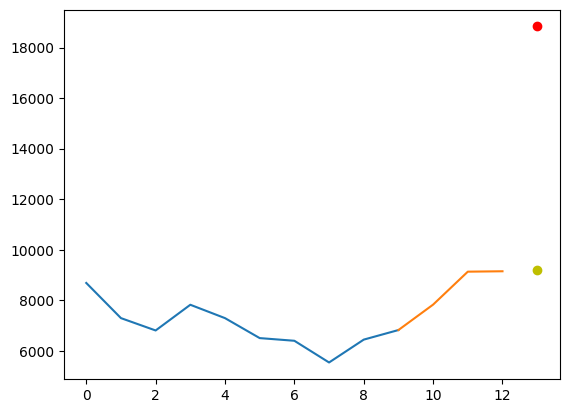

In [132]:
plt.plot(original_src_time_series)
plt.plot([9, 10, 11, 12], original_trg_time_series)
plt.plot([13], original_trg_y, 'yo')
plt.plot([13], original_output[0], 'ro')
#'ro'

In [174]:
tabular_cat_features_size = 2
tabular_cat_features_possible_nums = [45, 81]
d_model = 32

In [175]:
tabular_cat_features_embeddings_table = torch.nn.ModuleList(
            [torch.nn.Embedding(num_embeddings=tabular_cat_features_possible_nums[cat_feature_i],
                                embedding_dim=d_model)
             for cat_feature_i in range(tabular_cat_features_size)]
)

In [176]:
tabular_cat_embeddings = torch.sum(torch.stack([tabular_cat_features_embeddings_table[cat_feature_i](data['tabular_categorical_features'][:, cat_feature_i].long())
             for cat_feature_i in range(data['tabular_categorical_features'].shape[1])], dim=1), dim=1)

In [177]:
tabular_cat_embeddings.shape

torch.Size([256, 32])

In [178]:
# DONE

In [1143]:
data['tabular_numerical_features'] = data['tabular_numerical_features'].reshape(1, 5, 1)

In [1144]:
data['tabular_numerical_features'].shape

torch.Size([1, 5, 1])

In [1146]:
class FeedForwardLayer(torch.nn.Module):
    def __init__(
            self,
            input_size=1,
            hidden_size=32,
            output_size=32
    ):
        super(FeedForwardLayer, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [1147]:
ffn = FeedForwardLayer()

In [1148]:
tabular_num_features = ffn(data['tabular_numerical_features'])

In [1149]:
tabular_num_features.shape

torch.Size([1, 5, 32])

In [1150]:
time_series_cat_features_size = 1
time_series_cat_features_possible_nums = torch.IntTensor([2])
time_series_cat_features_embeddings_dim = 26

In [1151]:
time_series_cat_features_embeddings_table = nn.ModuleList(
            [nn.Embedding(num_embeddings=time_series_cat_features_possible_nums[cat_feature_i], embedding_dim=time_series_cat_features_embeddings_dim)
             for cat_feature_i in range(time_series_cat_features_size)]
)

In [1246]:
data['src_time_series_categorical_features'].shape

torch.Size([5, 10])

In [1289]:
data['src_time_series_categorical_features'] = data['src_time_series_categorical_features'].reshape(10, 5, -1)

In [1290]:
batch_size = data['src_time_series_categorical_features'].shape[0]

In [1291]:
data['src_time_series_categorical_features'].shape

torch.Size([10, 5, 1])

In [1292]:
time_series_cat_features=torch.cat([time_series_cat_features_embeddings_table[cat_feature_i](data['src_time_series_categorical_features'][:, :, cat_feature_i].long())
             for cat_feature_i in range(data['src_time_series_categorical_features'].shape[-1])], dim=-1)
    

In [1293]:
time_series_cat_features.shape

torch.Size([10, 5, 26])

In [1265]:
time_series_num_features = data['src_time_series_numerical_features'].reshape(10, 5, -1)

In [1266]:
time_series_num_features.shape

torch.Size([10, 5, 6])

In [1267]:
print(tabular_cat_embeddings.shape)
print(tabular_num_features.shape)
print(time_series_cat_features.shape)
print(time_series_num_features.shape)

torch.Size([2, 5, 32])
torch.Size([1, 5, 32])
torch.Size([10, 5, 26])
torch.Size([10, 5, 6])


In [1268]:
tabular_embeddings = torch.cat([tabular_cat_embeddings, tabular_num_features], dim=0)

In [1269]:
tabular_embeddings.shape

torch.Size([3, 5, 32])

In [1273]:
print(time_series_num_features.shape)

torch.Size([10, 5, 6])


In [1270]:
time_series_embeddings = torch.cat([time_series_cat_features, time_series_num_features], dim=-1)

In [1271]:
time_series_embeddings.shape

torch.Size([10, 5, 32])

In [1215]:
column_embedding_table = torch.nn.Embedding(num_embeddings=3 + 1, embedding_dim=32)
positional_embedding_table = torch.nn.Embedding(num_embeddings=10 + 1, embedding_dim=32)

In [1216]:
tabular_embeddings.shape

torch.Size([3, 5, 32])

In [1217]:
time_series_embeddings.shape

torch.Size([5, 10, 32])

In [1218]:
column_embedding_table(torch.IntTensor([0]))

tensor([[ 0.4668,  0.3048,  0.2959, -0.3498,  1.1223, -2.4230, -0.3287, -0.1352,
         -1.5053,  0.3417,  0.4774,  1.0340,  0.5035, -0.6018,  1.7864, -0.8862,
          0.9633,  1.8013, -0.1006,  0.4067,  1.1611,  1.1968, -0.0766,  0.6571,
          1.4259,  0.2372, -1.3344, -0.3572,  0.9219,  0.7024, -0.9807,  1.0322]],
       grad_fn=<EmbeddingBackward0>)

In [1219]:
time_series_embeddings += column_embedding_table(torch.IntTensor([0]))
for step_i in range(len(time_series_embeddings)):
    time_series_embeddings[step_i] += positional_embedding_table(torch.IntTensor([step_i + 1]))

In [1220]:
tabular_embeddings += positional_embedding_table(torch.IntTensor([0]))
for column_i in range(len(tabular_embeddings)):
    tabular_embeddings[column_i] += column_embedding_table(torch.IntTensor([column_i + 1]))

In [1221]:
time_series_embeddings = time_series_embeddings.reshape(5, 10, -1)

In [1222]:
time_series_embeddings.shape

torch.Size([5, 10, 32])

In [1223]:
tabular_embeddings = tabular_embeddings.reshape(5, 3, -1)

In [1224]:
tabular_embeddings.shape

torch.Size([5, 3, 32])

In [1249]:
catt = torch.cat([tabular_embeddings, time_series_embeddings], dim=1).reshape(batch_size, -1)

In [1250]:
catt.shape

torch.Size([5, 416])